Final Project Submission
Please fill out:

Student name:Matthew Daly
Student pace: part time 
Scheduled project review date: Aug 5, 2019
Instructor name: Eli

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import matplotlib.style as style
from keras import layers
from keras import models
from keras import optimizers
from sklearn.metrics import accuracy_score
style.use('fivethirtyeight')

In [27]:
df_train = pd.read_csv('sign-language-mnist/sign_mnist_train.csv')
df_test = pd.read_csv('sign-language-mnist/sign_mnist_test.csv')

In [28]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [29]:
df_train.shape, df_test.shape

((27455, 785), (7172, 785))

In [30]:
labels = df_train['label'].values

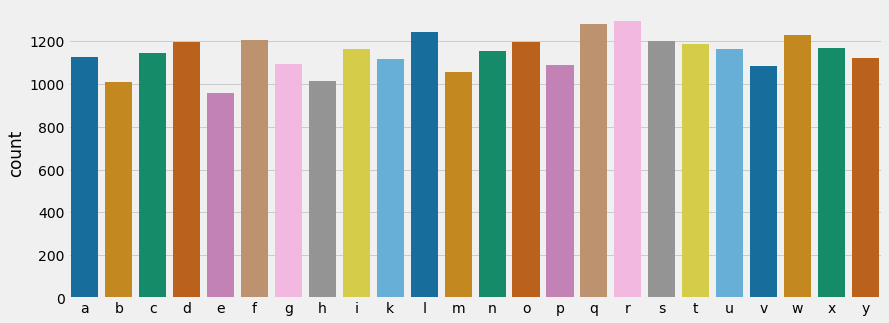

In [31]:
abc = ['a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']
style.use('seaborn-bright')
plt.figure(figsize=(13, 5))
sns.countplot(x=labels, palette=('colorblind'))
ind = np.arange(24)
plt.xticks(ind, abc)
plt.show()


In [32]:
print('Number of unique signs:', df_train.label.nunique())

Number of unique signs: 24


In [33]:
df_train.drop('label', axis=1, inplace=True)

In [34]:
images = df_train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

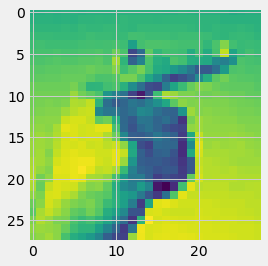

In [35]:
plt.imshow(images[52].reshape(28,28))

In [36]:
label_bin = LabelBinarizer()
labels = label_bin.fit_transform(labels)

In [37]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

Text(0.5, 1.0, '28x28 data')

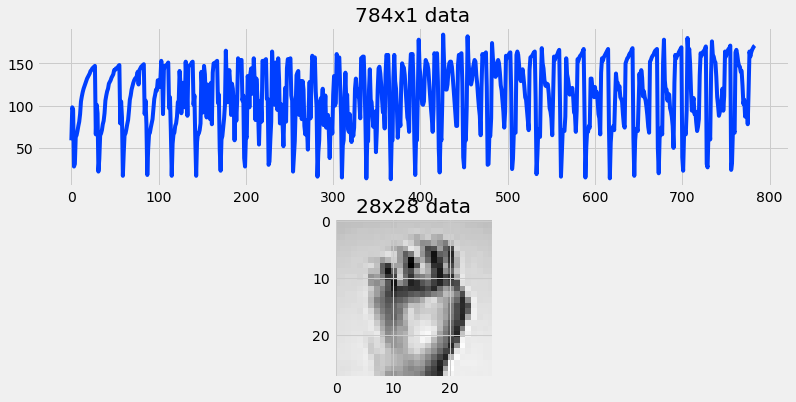

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[20].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')


In [40]:
x_train = x_train / 255
x_test = x_test / 255

In [41]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [42]:
batch_size = 50
num_classes = 24
epochs = 15

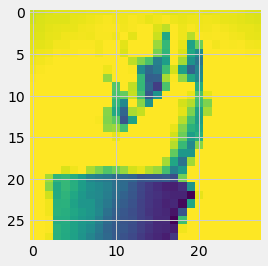

In [43]:
plt.imshow(x_train[25].reshape(28,28))

In [44]:
x_train.shape, x_test.shape

((19218, 28, 28, 1), (8237, 28, 28, 1))

In [45]:
y_train.shape, y_test.shape

((19218, 24), (8237, 24))

In [46]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))



In [47]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
__________

In [49]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/15
19218/19218 [==============================] - 16s 853us/step - loss: 2.2882 - acc: 0.2888 - val_loss: 1.0922 - val_acc: 0.6430
Epoch 2/15
19218/19218 [==============================] - 15s 798us/step - loss: 0.8793 - acc: 0.7016 - val_loss: 0.5347 - val_acc: 0.8329
Epoch 3/15
19218/19218 [==============================] - 16s 855us/step - loss: 0.4835 - acc: 0.8370 - val_loss: 0.2711 - val_acc: 0.9131
Epoch 4/15
19218/19218 [==============================] - 15s 783us/step - loss: 0.2896 - acc: 0.9012 - val_loss: 0.1894 - val_acc: 0.9361
Epoch 5/15
19218/19218 [==============================] - 16s 816us/step - loss: 0.1782 - acc: 0.9407 - val_loss: 0.1091 - val_acc: 0.9699
Epoch 6/15
19218/19218 [==============================] - 15s 791us/step - loss: 0.1204 - acc: 0.9620 - val_loss: 0.0538 - val_acc: 0.9868
Epoch 7/15
19218/19218 [==============================] - 16s 856us/step - loss: 0.0853 - acc: 0.9722 - val_loss: 0.0

In [50]:
final_loss, final_acc = model.evaluate(x_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0144, final accuracy: 0.9950


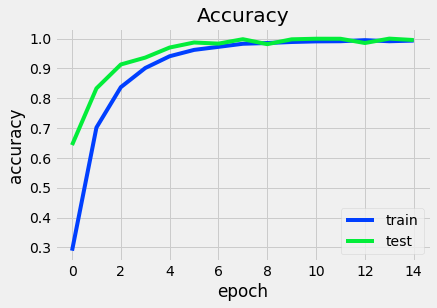

In [51]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [52]:
test_labels = df_test['label']

In [53]:
df_test.drop('label', axis=1, inplace=True)

In [54]:
test_imgs = df_test.values
test_imgs = np.array([np.reshape(i, (28, 28)) for i in test_imgs])
test_imgs = np.array([i.flatten() for i in test_imgs])

In [55]:
test_labels = label_bin.fit_transform(test_labels)

In [56]:
test_imgs = test_imgs.reshape(test_imgs.shape[0], 28, 28, 1)

In [57]:
test_imgs.shape

(7172, 28, 28, 1)

In [58]:
y_hat = model.predict(test_imgs)

In [59]:
loss,acc = model.evaluate(test_imgs, y_hat)
print("Model unseen data, accuracy: {:5.2f}%".format(100*acc))


7172/7172 [==============================] - 2s 212us/step
Model unseen data, accuracy: 100.00%


In [35]:
accuracy_score(test_labels, y_hat.round())

0.8322643614054657